<img src="images/AzPTravel_PPM.png">
<img src="images/papermill.png">

# GPM Data Collection Pipeline Run Controller

### This file is both a user interface and an executable callable from other processes.

### To use:
   - Set your required variable values in the "Set Instance Parameters" Section.
   - You can then run the entire pipeline by running all cells or notebooks one at a time as you wish.

### Quick todo list:

- add output viewers to the pipeline 
- make notes for all available BUs 
- get all countries to appear in the Travel Global Report
- Optimize this pipeline for user control 
- Metadata doc for every field to substitute for the many field lists and collections throughout this process.



In [59]:

import os
from datetime import datetime
import time
import shutil
import papermill as pm
from IPython.lib.pretty import pprint
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt

## Set Instance Parameters

In [60]:
commit = "Live run, add DE Allocations"
# give a reason for the run

percode = "2021.Q1"
# Data Collection Code, this controls file paths and output names

run_type = 1
#run_type =  0 - lite run with no reporting, not recommended.
#run_type =  1 - lite run with normal output reporting and no presentation layer reports, default setting.
#run_type =  2 - Heavy run with output reporting and  available for audits and troubleshooting.

fin_rep = 0
# include knitting finance report, no matter other selections

global_lob_rep = 0
# include knitting Global Travel LOB report, no matter other selections

all_dashboards = 0
# include knitting all available dashboards report, no matter other selections

specialchars = "-live DE Allocations"
# optional - add up to a 12 character code in order to mark your instance record .ipynb

## Source file format lookup

#### This is a list of file formats for each data collection.
- x : denotes that the source files are MS Excel documents.
- j : denotes the source files are json documents.
- p : denotes the source files are parquet documents.



In [61]:
if percode == "2019.Q4":
    s_format = "x"
elif percode == "2020.Q1":
    s_format = "x"
elif percode == "2020.Q3":
    s_format = "j"
elif percode == "2020.Q4":
    s_format = "j"
elif percode == "2021.Q1":
    s_format = "p"

## Record the datetimestamp for the instance

In [62]:
inst_datetime = datetime.now().strftime("%m%d%Y%H%M%S")
# a single datetime stamp for the full instance run

## set the instance archive folder

In [63]:
instances = f"//hecate/Insurance_US/Product Development/Product Management/"\
             f"Global PPM/Reporting/Data Collection/Pipeline Reporting Scripts/GPMpipeline/instances/{percode}"


## Add Paths

In [64]:
rt_path = f'//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/{str(percode)}'

outpath = os.path.join('//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection' , percode,   'Finance Report' )

scriptpath =   os.path.abspath(os.path.join(rt_path,"..", "..", "Pipeline Reporting Scripts","GPMpipeline", "shortcuts"))

scriptpath = scriptpath.replace(" ","%20")



## Add Files

In [65]:
outfile = 'Finance_Comparison_PnL.html'

prepfile = f"{percode}prep.csv"

prepcsv = os.path.join(str(rt_path), prepfile)

## Read the source files, append to create initial .csv.
- Process note: The instance is always stored in the archives with the execution of the notebook.
- The last run is moved with code to a static location for the link. 
- The "try logic" just ensures that even a failed notebook will have the instance available at the link

In [66]:
try:
    nb = pm.execute_notebook('pipeline/prep.ipynb', os.path.join( instances,'pipeline',  f'prep{inst_datetime}-{specialchars}.ipynb' ),
                              {'run_control': run_type, 'percode': percode,
                               'commit_message': commit, 'inst_datetime' : inst_datetime, 'source_type' : s_format } )
except:
    shutil.copy(os.path.join( instances,'pipeline',  f'prep{inst_datetime}-{specialchars}.ipynb' ),            
    os.path.abspath(os.path.join( instances  , '..','Last Run',  f'prep_last_run.ipynb' )   ) )  
    1/0 #force error

shutil.copy(os.path.join( instances,'pipeline',  f'prep{inst_datetime}-{specialchars}.ipynb' ),            
os.path.abspath(os.path.join( instances  , '..','Last Run',  f'prep_last_run.ipynb' )   ) );

[Open prep.ipynb.](pipeline/prep.ipynb)

[Open last prep.ipynb instance.](instances/Last%20Run/prep_last_run.ipynb)


### Output Summary

In [67]:


if run_type > 0:

    cols = ["Filename", "Size", "Last Modified" ]
    file_info_df = pd.DataFrame(columns = cols)
    name = f"{percode}prep.csv"
    size = round((os.path.getsize(prepcsv) /1000000),1)  # size in MB
    moddate = os.path.getctime(prepcsv)# time of last metadata change;
    moddate = datetime.fromtimestamp(moddate).strftime('%Y-%m-%d %H:%M:%S')# format change;
    new_row = pd.DataFrame([[name, size, moddate]], columns = cols)
    file_info_df = file_info_df.append(new_row, ignore_index=True)
    file_info_df
    
else:

    pass

%store -r prep_df

df = prep_df

df["Earned Revenues net of Taxes"] = df["Earned Revenues net of Taxes"].astype(float)



dfp = (df.pivot_table(index=( "Country", "Submission File"), columns=("Reporting Date From","Reporting Date To" ), values="Earned Revenues net of Taxes").fillna(0).astype(int))

dfp


,Reporting Date From,2021-01-01
,Reporting Date To,2021-03-31
Country,Submission File,
AT,us_dat_at_+te_q1_2021_at.parquet,9028
AU,us_dat_au_05142021143612.parquet,271718
BG,us_dat_at_+te_q1_2021_at.parquet,15683
CA,us_dat_ca_05202021134242.parquet,687067
CH,us_dat_ch_06042021132401.parquet,2617
CZ,us_dat_cz_05262021090243.parquet,55341
DE,us_dat_de_06082021183745.parquet,238937
ES,us_dat_es_05202021105141.parquet,26294


## Read the prep file into the pipeline.

In [68]:
try:
    nb = pm.execute_notebook( 'pipeline/read_dc.ipynb', os.path.join( instances,'pipeline', f'read_dc{inst_datetime}-{specialchars}.ipynb' ),
                              {'run_control': run_type, 'percode': percode,
                               'commit_message': commit, 'inst_datetime' : inst_datetime } )

except:
    shutil.copy(os.path.join( instances,'pipeline',  f'read_dc{inst_datetime}-{specialchars}.ipynb' ),            
    os.path.abspath(os.path.join( instances  , '..','Last Run',  f'read_dc_last_run.ipynb' )   ) )
    1/0 #force error 
    
    
shutil.copy(os.path.join( instances,'pipeline',  f'read_dc{inst_datetime}-{specialchars}.ipynb' ),            
os.path.abspath(os.path.join( instances  , '..','Last Run',  f'read_dc_last_run.ipynb' )   ) );

[Open read_dc_last_run.ipynb.](pipeline/read_dc.ipynb)

[Open last read_dc.ipynb instance.](instances/Last%20Run/read_dc_last_run.ipynb)

### Paste this link to view the instance notebook

In [69]:
print(os.path.join( instances,'pipeline', f'read_dc{inst_datetime}-{specialchars}.ipynb' ))

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Pipeline Reporting Scripts/GPMpipeline/instances/2021.Q1\pipeline\read_dc06152021135514--live DE Allocations.ipynb


### Output Summary

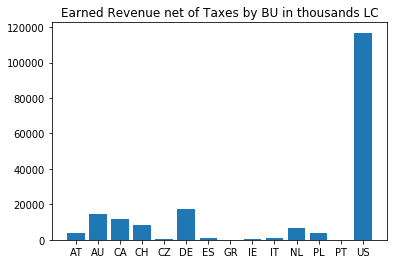

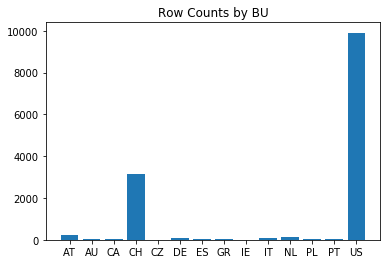

In [70]:
tempfile = f"{percode}.parquet"

prepcsv = os.path.join(str(rt_path), tempfile)

%store -r read_dc_df
df = read_dc_df

if run_type > 0:

    sumdata = df.groupby(['Business Unit']).sum()
    sumdata = sumdata.reset_index()
    plt.bar(sumdata['Business Unit'], sumdata['Earned Revenues net of Taxes']/1000)
    plt.title('Earned Revenue net of Taxes by BU in thousands LC')
    plt.show()

    countdata = df.groupby(['Business Unit']).count()
    countdata = countdata.reset_index()
    plt.bar(countdata['Business Unit'], countdata['Earned Revenues net of Taxes'])
    plt.title('Row Counts by BU')
    plt.show()

else:
    print("Charts Skipped")

## Read initial .csv, make transformations in python, output to {percode}.localcur.parquet

In [71]:
try:
    nb = pm.execute_notebook( 'pipeline/py_transform.ipynb', os.path.join( instances,'pipeline', f'py_transform{inst_datetime}-{specialchars}.ipynb' ),
                          {'run_control': run_type, 'percode': percode,
                           'commit_message': commit, 'inst_datetime' : inst_datetime  } )
except:
    shutil.copy(os.path.join( instances,'pipeline',  f'py_transform{inst_datetime}-{specialchars}.ipynb' ),
                os.path.abspath(os.path.join( instances  , '..','Last Run',  f'py_transform_last_run.ipynb' )   ) )
    1/0 #force error
    
shutil.copy(os.path.join( instances,'pipeline',  f'py_transform{inst_datetime}-{specialchars}.ipynb' ),            
os.path.abspath(os.path.join( instances  , '..','Last Run',  f'py_transform_last_run.ipynb' )   ) );

[Open py_transform.ipynb.](pipeline/py_transform.ipynb)

[Open last py_transform.ipynb instance.](instances/Last%20Run/py_transform_last_run.ipynb)

### Output Summary

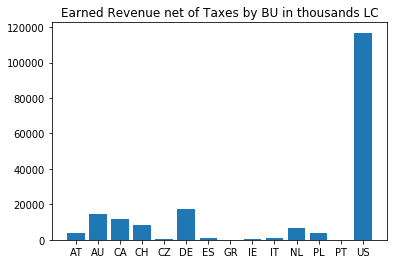

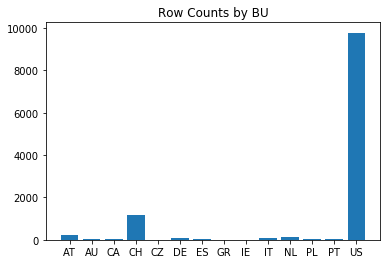

In [72]:
tempfile = f"{percode}.localcur.parquet"

prepcsv = os.path.join(str(rt_path), tempfile)

%store -r py_t_df
df = py_t_df


if run_type > 0:

    sumdata = df.groupby(['business_unit']).sum()
    sumdata = sumdata.reset_index()
    plt.bar(sumdata['business_unit'], sumdata['earned_revenues_net_of_taxes']/1000)
    plt.title('Earned Revenue net of Taxes by BU in thousands LC')
    plt.show()

    countdata = df.groupby(['business_unit']).count()
    countdata = countdata.reset_index()
    plt.bar(countdata['business_unit'], countdata['earned_revenues_net_of_taxes'])
    plt.title('Row Counts by BU')
    plt.show()

else:
    print("Charts Skipped")

## Read {percode}.localcur.parquet make transformations in r , output to {percode}.localcur.parquet

In [73]:
try:
    nb = pm.execute_notebook( 'pipeline/r_transform.ipynb', os.path.join( instances,'pipeline',f'r_transform{inst_datetime}-{specialchars}.ipynb' ),
                              {'run_control': run_type, 'percode': percode,
                               'commit_message': commit, 'inst_datetime' : inst_datetime  } )
except:
    shutil.copy(os.path.join( instances,'pipeline',  f'r_transform{inst_datetime}-{specialchars}.ipynb' ),            
    os.path.abspath(os.path.join( instances  , '..','Last Run',  f'r_transform_last_run.ipynb' )   ) )
    1/0 #force error
    
shutil.copy(os.path.join( instances,'pipeline',  f'r_transform{inst_datetime}-{specialchars}.ipynb' ),            
os.path.abspath(os.path.join( instances  , '..','Last Run',  f'r_transform_last_run.ipynb' )   ) );

[Open r_transform.ipynb.](pipeline/r_transform.ipynb)

[Open last r_transform.ipynb instance.](instances/Last%20Run/r_transform_last_run.ipynb)

## Read {percode}.localcur.parquet, output to {percode}.localcur.csv, make Euro fx conversions, output to {percode}.euroconv.csv

In [74]:
try:
    nb = pm.execute_notebook( 'pipeline/make_output.ipynb', os.path.join( instances,'pipeline', f'make_output{inst_datetime}-{specialchars}.ipynb' ),
                          {'run_control': run_type, 'percode': percode,
                           'commit_message': commit, 'inst_datetime' : inst_datetime  } )

except:
    shutil.copy(os.path.join( instances,'pipeline',  f'make_output{inst_datetime}-{specialchars}.ipynb' ),            
    os.path.abspath(os.path.join( instances  , '..','Last Run',  f'make_output_last_run.ipynb' )   ) )
    1/0 #force error
    
shutil.copy(os.path.join( instances,'pipeline',  f'make_output{inst_datetime}-{specialchars}.ipynb' ),            
os.path.abspath(os.path.join( instances  , '..','Last Run',  f'make_output_last_run.ipynb' )   ) );

[Open make_output.ipynb.](pipeline/make_output.ipynb)

[Open last make_output.ipynb instance.](instances/Last%20Run/make_output_last_run.ipynb)


In [75]:
lfile = f'//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/{str(percode)}\\{str(percode)}.localcur.csv'
efile =  f'//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/{str(percode)}\\{str(percode)}.euroconv.csv'

cols = ["Filename", "Size", "Last Modified" ]
file_info_df = pd.DataFrame(columns = cols)

name = f"{percode}.localcur.csv"
size = round((os.path.getsize(lfile) /1000000),1)  # size in MB
moddate = os.path.getctime(lfile)# time of last metadata change;
moddate =  datetime.fromtimestamp(moddate).strftime('%Y-%m-%d %H:%M:%S')# format change;
new_row = pd.DataFrame([[name, size, moddate]], columns = cols)
l_file_info_df = file_info_df.append(new_row, ignore_index=True)

name = f"{percode}.euroconv.csv"
size = round((os.path.getsize(efile) /1000000),1)  # size in MB
moddate = os.path.getctime(efile)# time of last metadata change;
moddate =  datetime.fromtimestamp(moddate).strftime('%Y-%m-%d %H:%M:%S')# format change;
new_row = pd.DataFrame([[name, size, moddate]], columns = cols)
e_file_info_df = file_info_df.append(new_row, ignore_index=True)


print("Pipeline has run successfully.")
print(l_file_info_df)
print(e_file_info_df)

from IPython.core.display import display, HTML
display(HTML("""<a href="https://google.at">text</a>"""))


Pipeline has run successfully.
               Filename  Size        Last Modified
0  2021.Q1.localcur.csv  10.6  2021-06-15 14:01:52
               Filename  Size        Last Modified
0  2021.Q1.euroconv.csv  12.3  2021-06-15 14:04:38


In [76]:
from IPython.core.display import display, HTML



display(HTML(f"""<a href="file:{scriptpath}">Go to source file folder</a>"""))

## Create Audit Reporting, checks Euro conversion and gives visual representation of rows and KPIs vs PY prior period.

In [77]:
if run_type  > 0 :

    try:
        nb = pm.execute_notebook( 'reporting/Audit Report.ipynb', os.path.join( instances,'reporting', f'Audit Report{inst_datetime}-{specialchars}.ipynb' ),
                                  {'run_control': run_type, 'percode': percode,
                                   'commit_message': commit, 'inst_datetime' : inst_datetime  } )

    except:
        shutil.copy(os.path.join( instances,'reporting',  f'Audit Report{inst_datetime}-{specialchars}.ipynb' ),            
        os.path.abspath(os.path.join( instances  , '..','Last Run',  f'Audit Report.ipynb' )   ) )
        1/0 #force error
        
    shutil.copy(os.path.join( instances,'reporting',  f'Audit Report{inst_datetime}-{specialchars}.ipynb' ),            
    os.path.abspath(os.path.join( instances  , '..','Last Run',  f'Audit Report.ipynb' )   ) );   


else:

        pass



In [78]:
%store -r euro_df

print("Aggregated Euro conversion against source, 'value' column is calulated form source files just created. It should match 'EUR_2_LC' column.")

euro_df

Aggregated Euro conversion against source, 'value' column is calulated form source files just created. It should match 'EUR_2_LC' column.


,country,currency,value,CurrCode,Country,EUR_2_LC,LC_2_EUR
0,AT,EUR,1.00000,EUR,Euro,1.00000,1.000000
1,AU,AUD,1.54310,AUD,Australia,1.54310,0.648046
2,BG,EUR,1.00000,EUR,Euro,1.00000,1.000000
3,CA,CAD,1.47720,CAD,Canada,1.47720,0.676956
4,CH,CHF,1.10615,CHF,Switzerland,1.10615,0.904037
5,CZ,EUR,1.00000,EUR,Euro,1.00000,1.000000
6,DE,EUR,1.00000,EUR,Euro,1.00000,1.000000
7,ES,EUR,1.00000,EUR,Euro,1.00000,1.000000
8,GR,EUR,1.00000,EUR,Euro,1.00000,1.000000
9,HU,EUR,1.00000,EUR,Euro,1.00000,1.000000


## Visual display of rows contained the submission against the previous and YOY files by country.

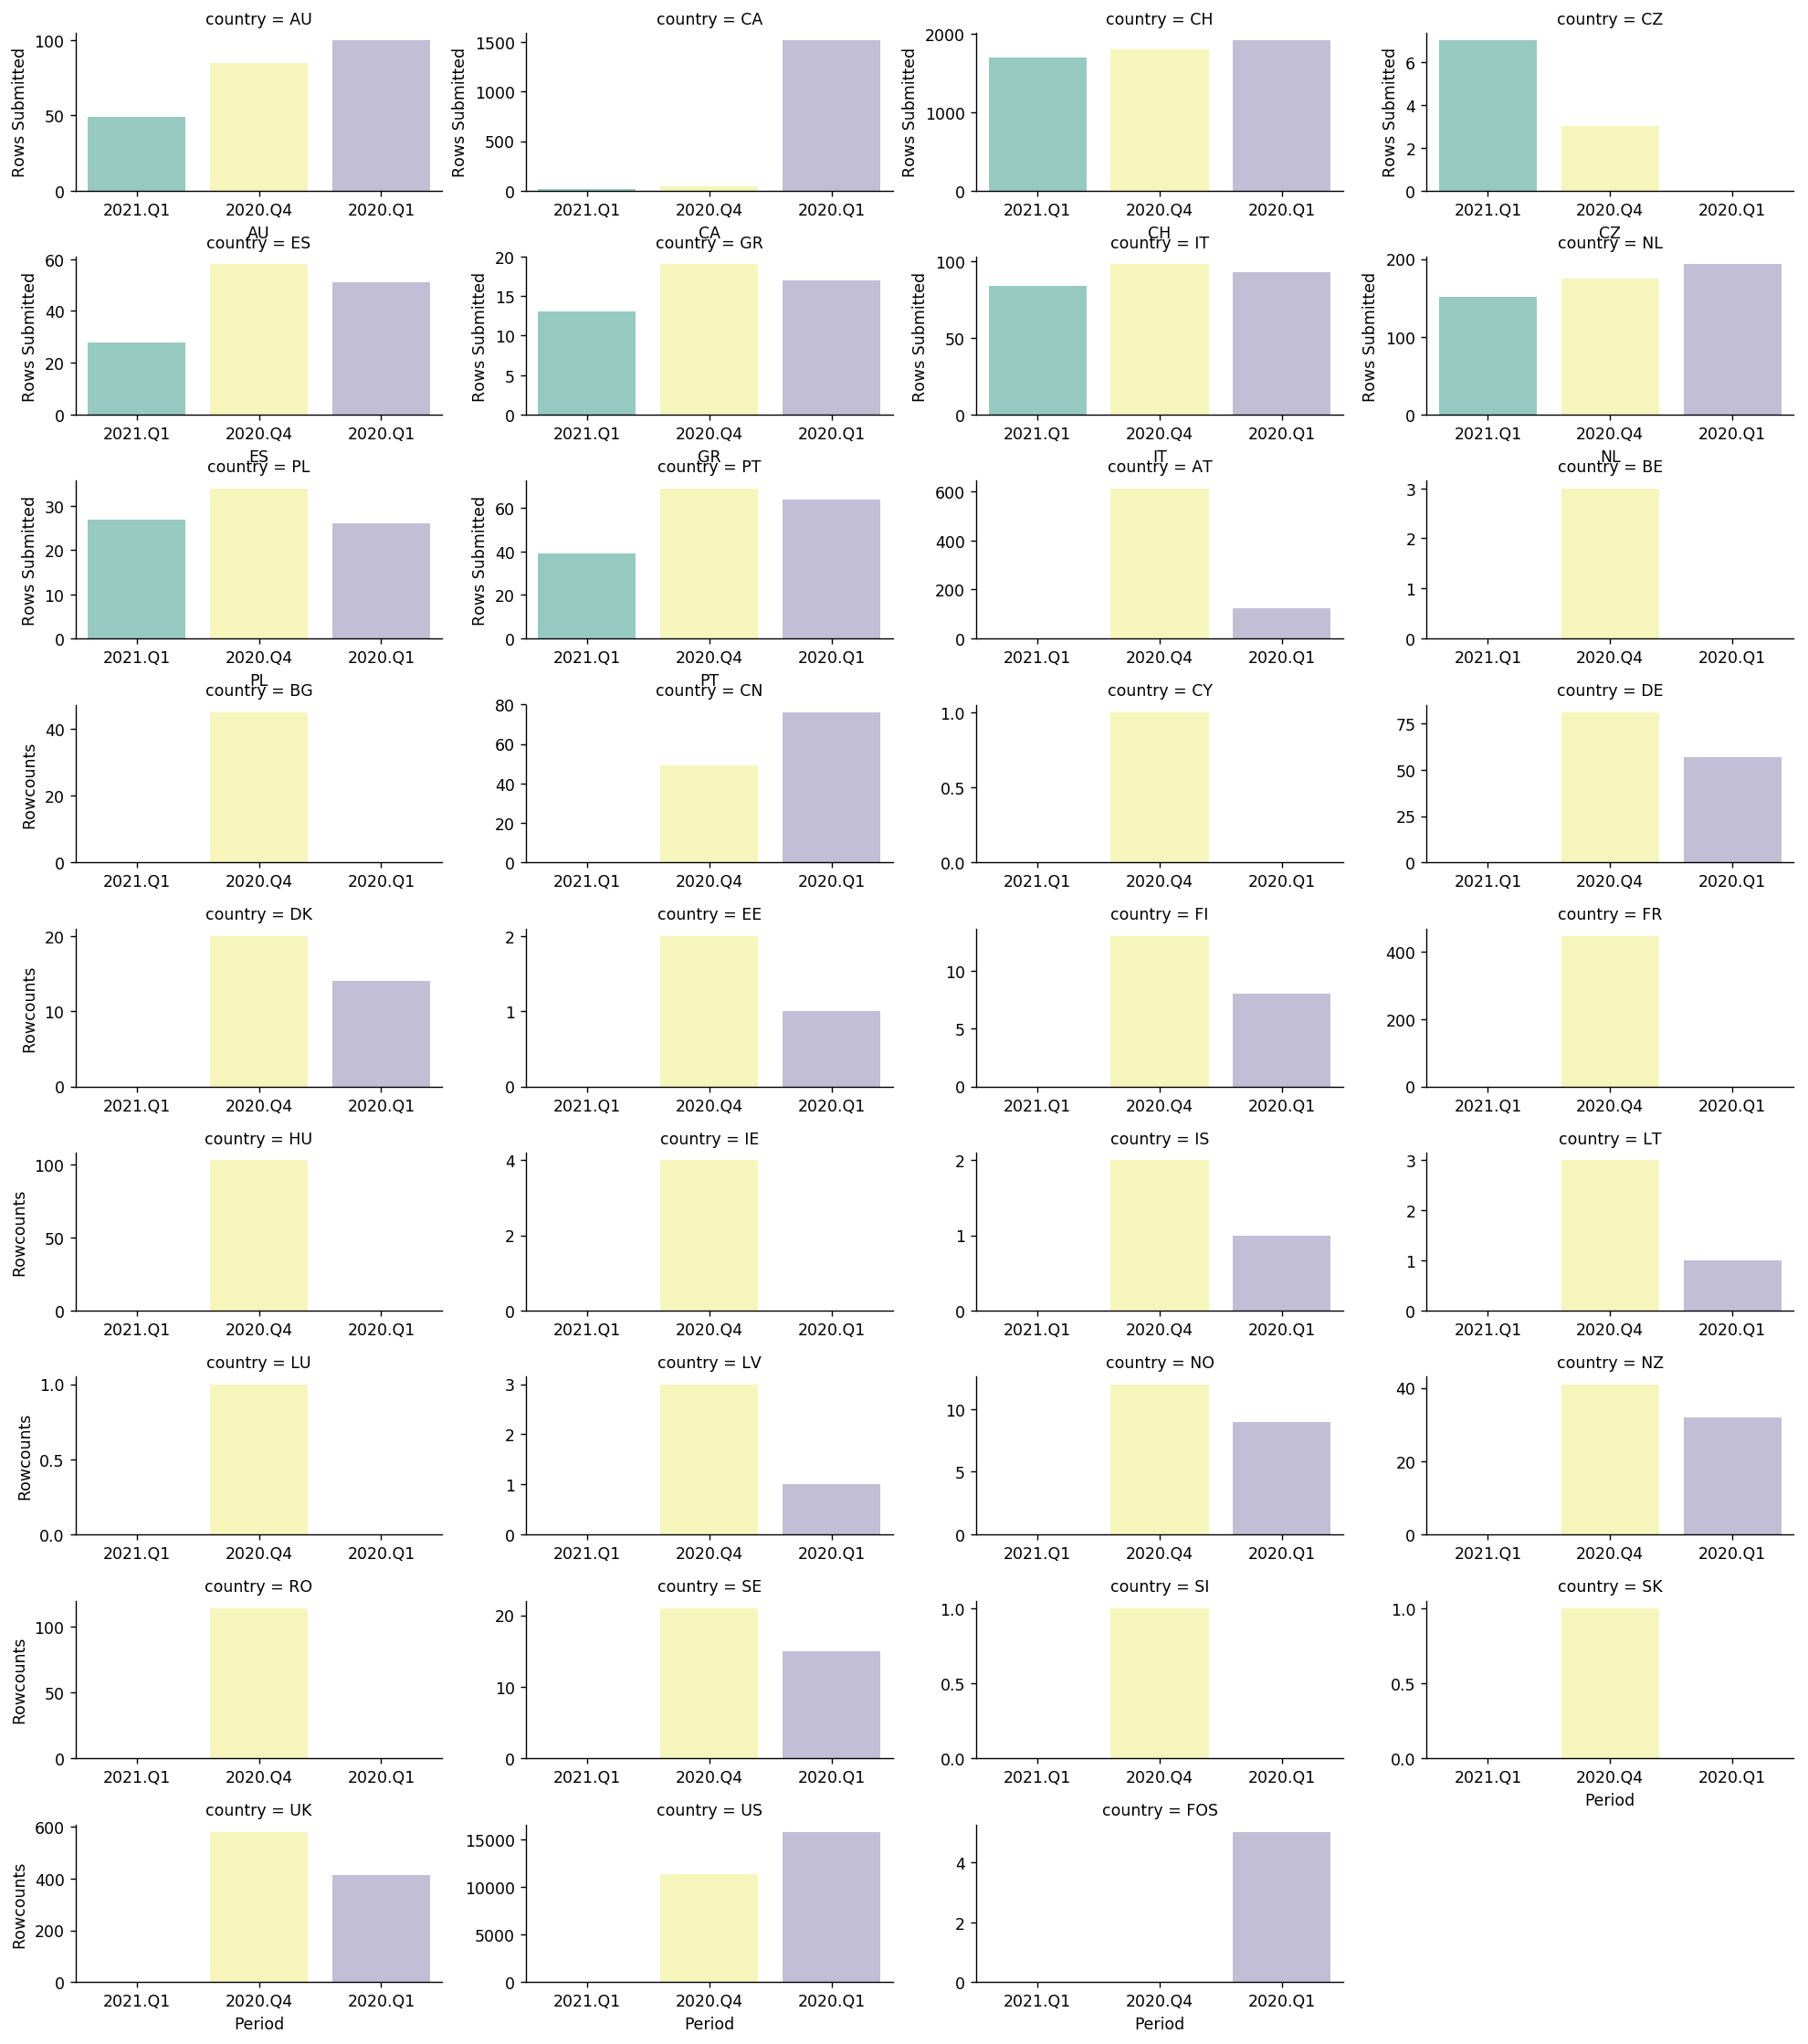

In [79]:


Image(filename='reporting/rows.png')



In [80]:
## Visual display of KPI values aggregated by country for the submission against the previous and YOY files.

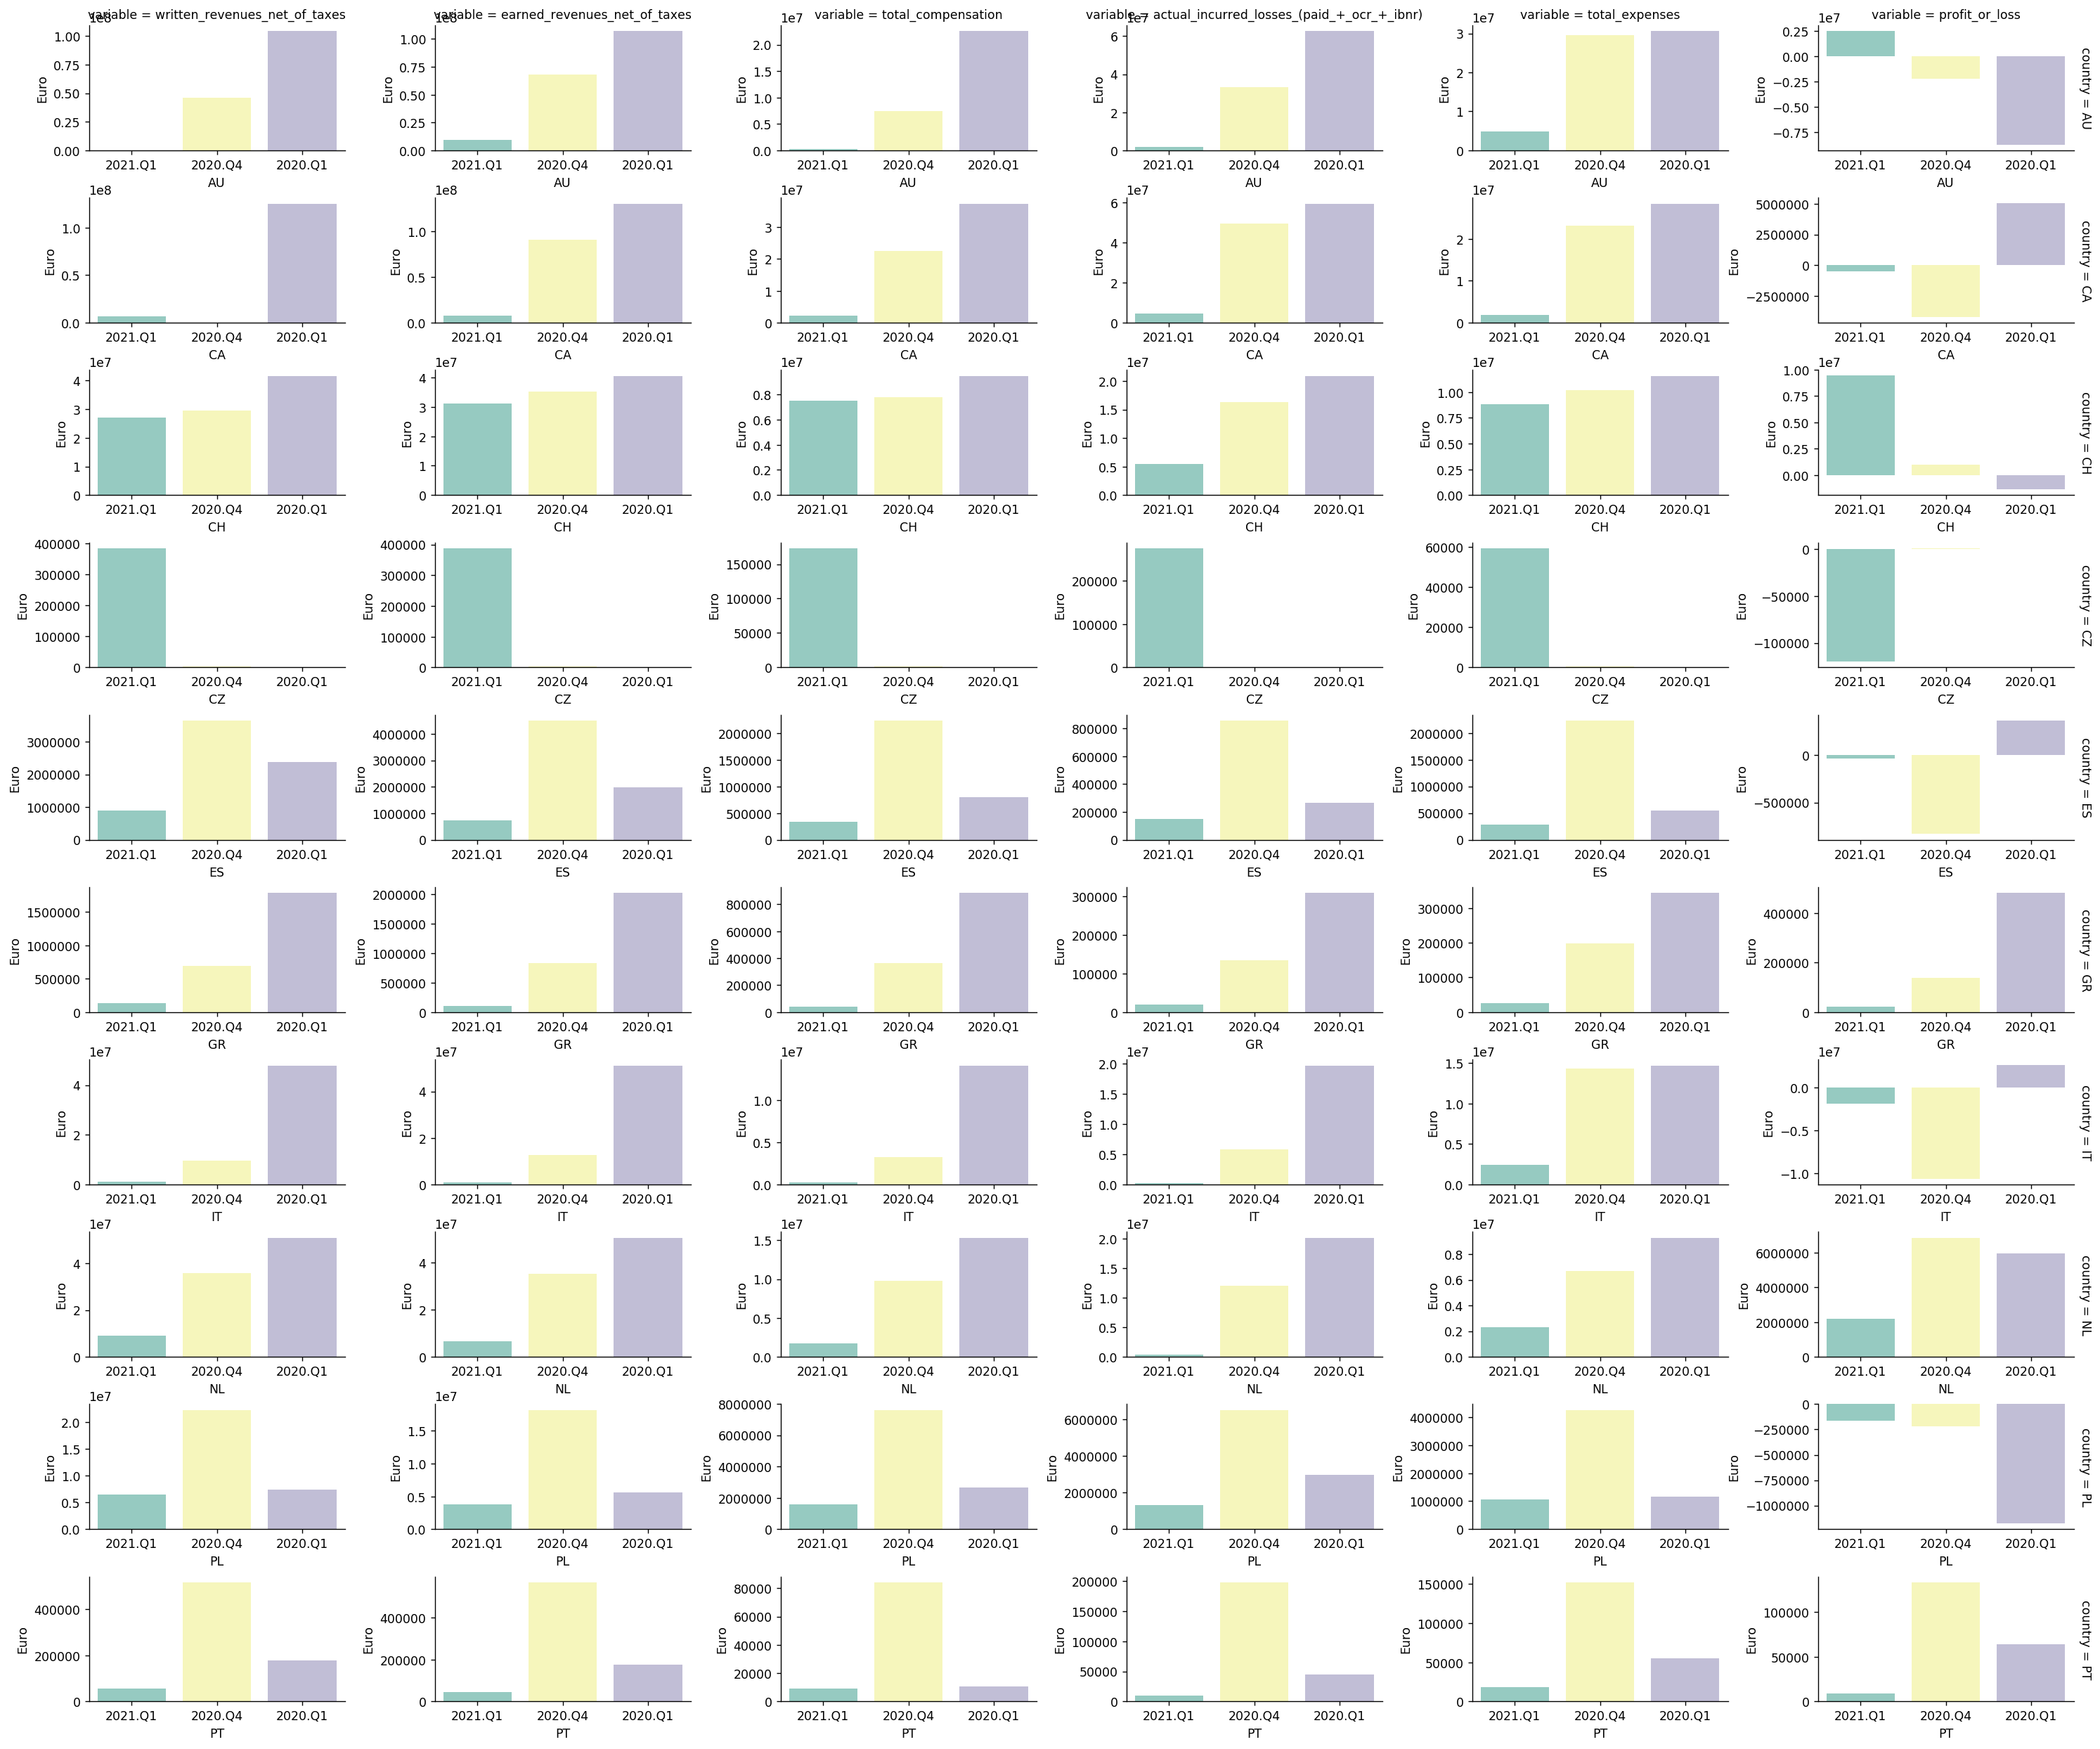

In [81]:
Image(filename='reporting/KPIs.png')



In [82]:
## Visual display of KPI values aggregated by country for the submission against the previous and YOY files. This is grouped by period instead of KPI.

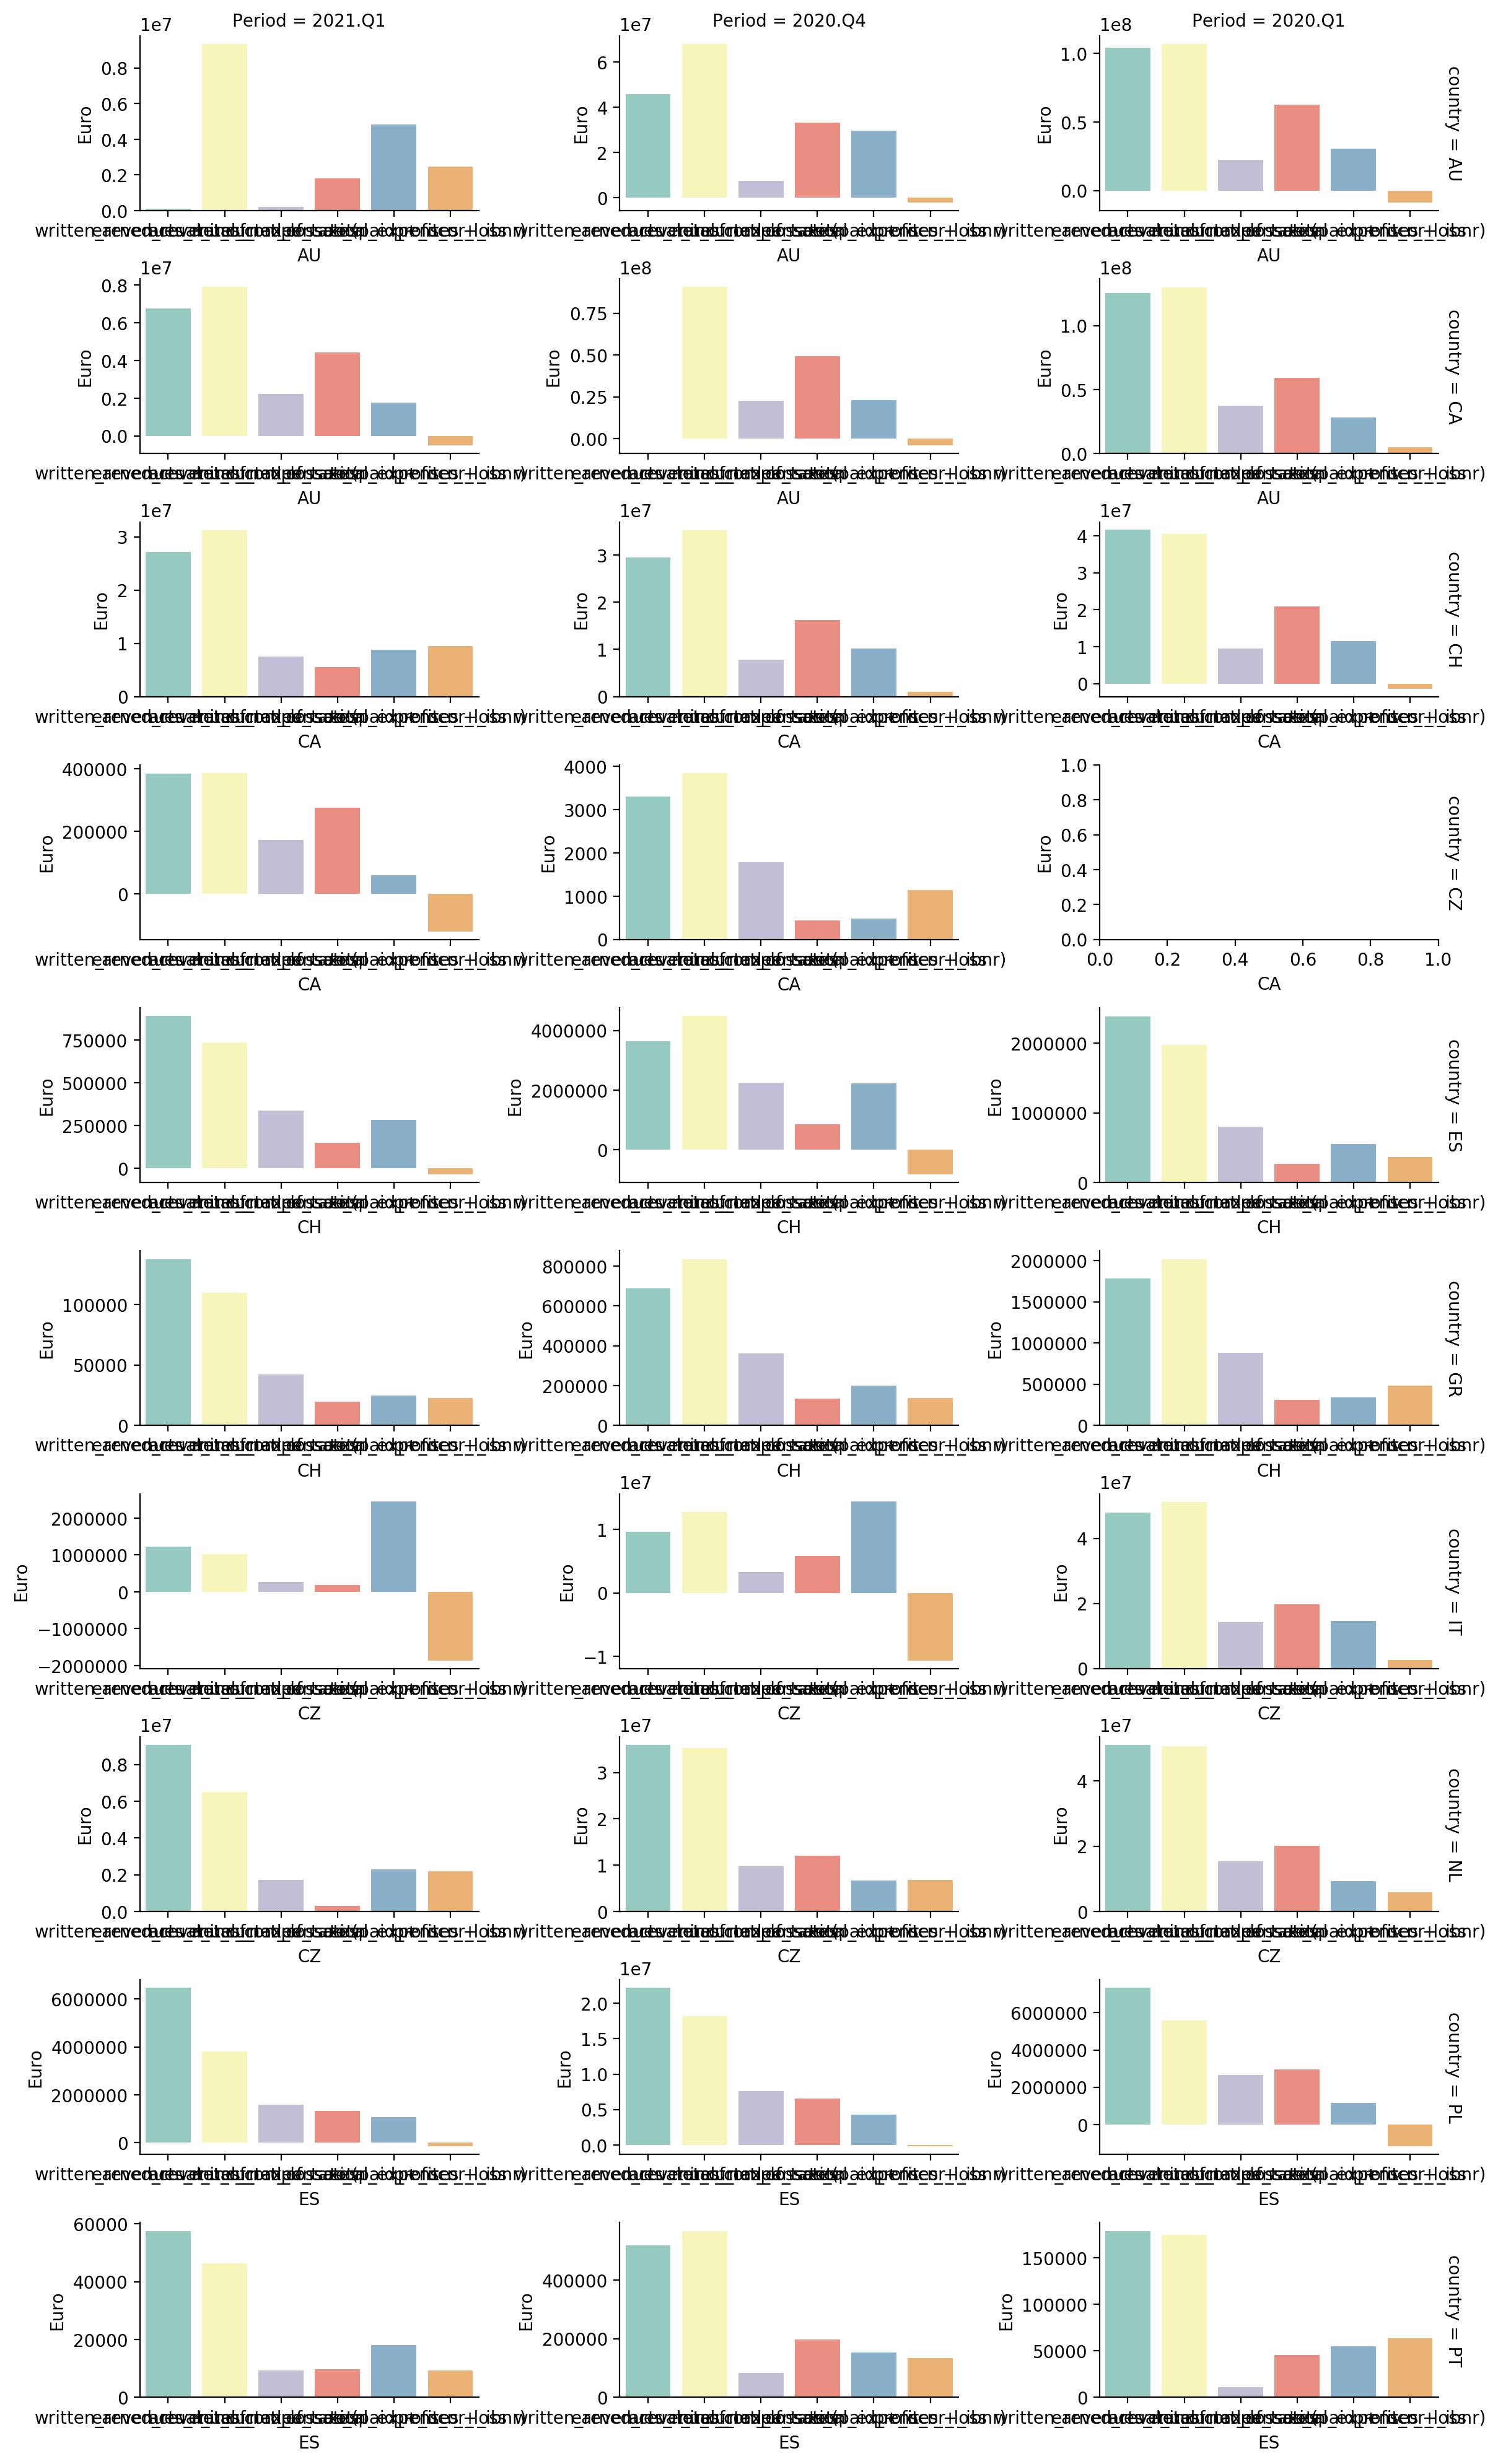

In [83]:

Image(filename='reporting/KPIs_vw2.png')

#### Create validation Reports Containing validation data sets and commentary by BU

In [84]:
if run_type  > 0 :

    try:
        nb = pm.execute_notebook( 'reporting/Make Validation Output Reports With Comments.ipynb', os.path.join( instances,'reporting', f'Make Validation Output Reports With Comments{inst_datetime}-{specialchars}.ipynb' ),
                                  {'run_control': run_type, 'percode': percode,
                                   'commit_message': commit, 'inst_datetime' : inst_datetime  } )

    except:
        shutil.copy(os.path.join( instances,'reporting',  f'Make Validation Output Reports With Comments{inst_datetime}-{specialchars}.ipynb' ),            
        os.path.abspath(os.path.join( instances  , '..','Last Run',  f'Make Validation Output Reports With Comments.ipynb' )   ) )
        1/0 #force error
        
    shutil.copy(os.path.join( instances,'reporting',  f'Make Validation Output Reports With Comments{inst_datetime}-{specialchars}.ipynb' ),            
    os.path.abspath(os.path.join( instances  , '..','Last Run',  f'Make Validation Output Reports With Comments_last_run.ipynb' )   ) );   


else:

        pass



ZeroDivisionError: division by zero

[Open Make Validation Output Reports With Comments.ipynb.](reporting/Make%20Validation%20Output%20Reports%20With%20Comments.ipynb)

[Open last Make Validation Output Reports With Comments.ipynb instance.](instances/Last%20Run/Make%20Validation%20Output%20Reports%20With%20Comments_last_run.ipynb)

#### Make Summary and Comments Reports

In [ ]:


if run_type  > 0 :

    try:
        nb = pm.execute_notebook( 'reporting/Make Survey and Comments Reports.ipynb', os.path.join( instances,'reporting', f'Make Survey and Comments Reports{inst_datetime}-{specialchars}.ipynb' ),
                                  {'run_control': run_type, 'percode': percode,
                                   'commit_message': commit, 'inst_datetime' : inst_datetime  } )

    except:
        shutil.copy(os.path.join( instances,'reporting',  f'Make Survey and Comments Reports{inst_datetime}-{specialchars}.ipynb' ),            
        os.path.abspath(os.path.join( instances  , '..','Last Run',  f'Make Survey and Comments Reports.ipynb' )   ) )
        1/0 #force error
        
    shutil.copy(os.path.join( instances,'reporting',  f'Make Validation Output Reports With Comments{inst_datetime}-{specialchars}.ipynb' ),            
    os.path.abspath(os.path.join( instances  , '..','Last Run',  f'Make Survey and Comments Reports.ipynb' )   ) );   


else:

        pass



[Open Make Survey and Comments Reports.](reporting/Make%20Survey%20and%20Comments%20Reports.ipynb)

[Open last Make Validation Output Reports With Comments.ipynb instance.](instances/Last%20Run/Make%20Survey%20and%20Comments%20Reports_last_run.ipynb)

#### Post data creation processes to combine GPM data with finance reporting

In [ ]:
if run_type + fin_rep > 0 :
    
    try:
        nb = pm.execute_notebook( 'reporting/P&L by Business Unit.ipynb', os.path.join( instances,'reporting', f'P&L by Business Unit{inst_datetime}-{specialchars}.ipynb' ),
                                  {'run_control': run_type, 'percode': percode,
                                   'commit_message': commit, 'inst_datetime' : inst_datetime  } )
    except:
        shutil.copy(os.path.join( instances,'reporting',  f'P&L by Business Unit{inst_datetime}-{specialchars}.ipynb' ),            
        os.path.abspath(os.path.join( instances  , '..','Last Run',  f'P&L by Business Unit_last_run.ipynb' )   ) )
        1/0 #force error 
        
    shutil.copy(os.path.join( instances,'reporting',  f'P&L by Business Unit{inst_datetime}-{specialchars}.ipynb' ),            
    os.path.abspath(os.path.join( instances  , '..','Last Run',  f'P&L by Business Unit_last_run.ipynb' )   ) );

        
else:

    pass





[Open P&L by Business Unit.ipynb.](reporting/P&L%20by%20Business%20Unit.ipynb)

[Open last P&L by Business Unit.ipynb instance.](instances/Last%20Run/P&L%20by%20Business%20Unit_last_run.ipynb)

#### Knit the Finance Comparison PnL

In [ ]:
if run_type + fin_rep > 0 :
    
    try:
        nb = pm.execute_notebook( 'reporting/knit Finance_Comparison_PnL.ipynb', os.path.join( instances,'reporting', f'knit Finance_Comparison_PnL{inst_datetime}-{specialchars}.ipynb' ),
                              {'run_control': run_type, 'percode': percode,
                               'commit_message': commit, 'inst_datetime' : inst_datetime  } );

    except:
        shutil.copy(os.path.join( instances,'reporting',  f'knit Finance_Comparison_PnL{inst_datetime}-{specialchars}.ipynb' ),            
        os.path.abspath(os.path.join( instances  , '..','Last Run',  f'knit Finance_Comparison_PnL_last_run.ipynb' )   ) );
        1/0 #force error
        
    shutil.copy(os.path.join( instances,'reporting',  f'knit Finance_Comparison_PnL{inst_datetime}-{specialchars}.ipynb' ),            
    os.path.abspath(os.path.join( instances  , '..','Last Run',  f'knit Finance_Comparison_PnL_last_run.ipynb' )   ) );


else:

    pass

[Open knit Finance_Comparison_PnL.](reporting/knit%20Finance_Comparison_PnL.ipynb)

[Open last knit Finance_Comparison_PnL.ipynb instance.](instances/Last%20Run/knit%20Finance_Comparison_PnL_last_run.ipynb)

####  Open the HTML Report, print its last modified date

In [ ]:
if run_type + fin_rep > 0 :

    openhtml = os.path.join(outpath,outfile)
    #os.startfile(os.path.abspath(openhtml)) # already happens

    moddate = os.path.getctime(openhtml)# time of last metadata change;
    moddate =  datetime.fromtimestamp(moddate).strftime('%Y-%m-%d %H:%M:%S')# format change;
    print(moddate)

else:

    pass

#### Knit Travel Global LOB Report

In [ ]:
if run_type + global_lob_rep > 0 :
    
    try:
        nb = pm.execute_notebook( 'reporting/knit Travel_Global_Report.ipynb', os.path.join( instances,'reporting', f'knit Travel_Global_Report{inst_datetime}-{specialchars}.ipynb' ),
                                  {'run_control': run_type, 'percode': percode,
                                   'commit_message': commit, 'inst_datetime' : inst_datetime  } )
    except:
        shutil.copy(os.path.join( instances,'reporting',  f'knit Travel_Global_Report{inst_datetime}-{specialchars}.ipynb' ),            
        os.path.abspath(os.path.join( instances  , '..','Last Run',  f'knit Travel_Global_Report_last_run.ipynb' )   ) )
        1/0 #force error
        
    shutil.copy(os.path.join( instances,'reporting',  f'knit Travel_Global_Report{inst_datetime}-{specialchars}.ipynb' ),            
    os.path.abspath(os.path.join( instances  , '..','Last Run',  f'knit Travel_Global_Report_last_run.ipynb' )   ) );
    
    
else:

    pass

[Open knit Travel_Global_Report.ipynb.](reporting/knit%20Travel_Global_Report.ipynb)

[Open last knit Travel_Global_Report.ipynb instance.](instances/Last%20Run/knit%20Travel_Global_Report_last_run.ipynb)

### Knit Business Unit Dashboards - Coming soon